# Практикалық тапсырмалар (EDA)


## 1. Жеңіл деңгей (Basic)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n
import pandas as pd

%matplotlib inline
sns.set(style="whitegrid")

### Деректерді зерттеу
Titanic деректер жинағын жүктеп, оның өлшемін (shape) және бағандарын (columns) қараңыз.
Әр бағандағы бос мәндердің санын анықтаңыз.


In [5]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
print("Дерек өлшемі: ")
df.shape

Дерек өлшемі: 


(891, 15)

In [8]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Сандық бағандарды сипаттау
age және fare бағандарының орташа мәнін, минимумы, максимумы және стандартты ауытқуын есептеңіз


In [10]:
df[['age', 'fare']].agg(['mean', 'min', 'max', 'std'])

,age,fare
mean,29.699118,32.204208
min,0.420000,0.000000
max,80.000000,512.329200
std,14.526497,49.693429


### Гистограмма
age бағанын гистограмма түрінде бейнелеңіз.
KDE қисығын қосып көріңіз.


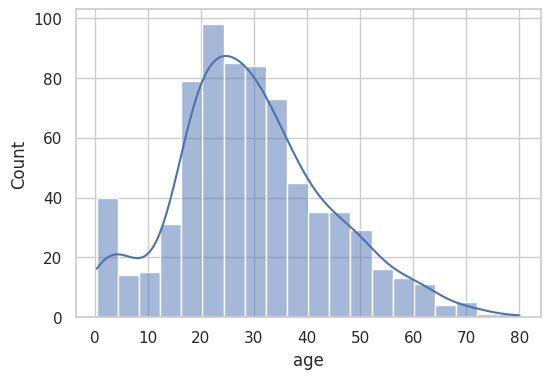

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True)
plt.show()

## 2. Орташа деңгей (Intermediate)



### Boxplot
pclass бойынша fare бағанын Boxplot арқылы бейнелеңіз.
Қорапшадан көрініп тұрған ауытқуларды анықтаңыз.


/tmp/ipython-input-1701424876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette='Set2')


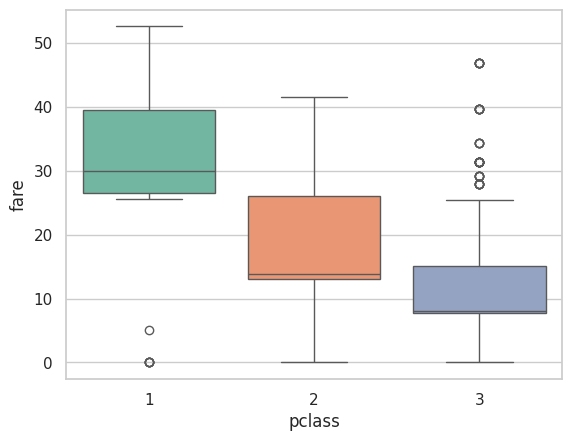

In [41]:
sns.boxplot(x='pclass', y='fare', data=df, palette='Set2')
plt.show()

### Scatter plot
age және fare бағандарын нүктелік диаграммада бейнелеңіз.
survived бағанына қарай түсін өзгертіңіз.


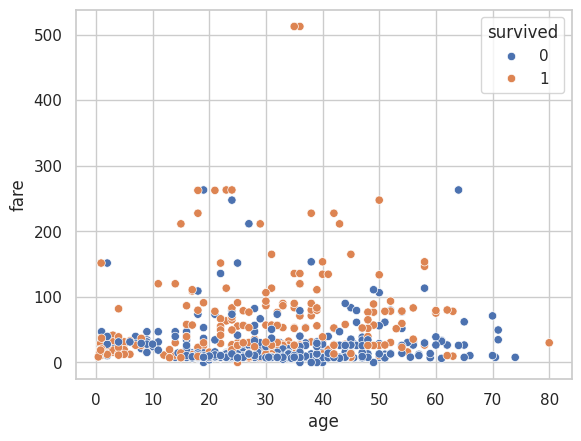

In [13]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.show()

### Heatmap
Сандық бағандардың корреляциясын анықтап, оны Seaborn heatmap арқылы визуализациялаңыз.


<Axes: >

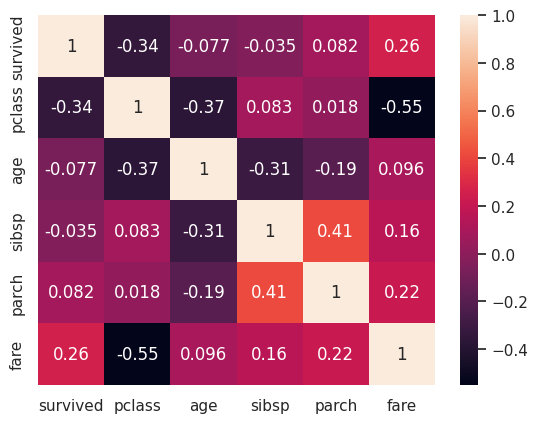

In [15]:
# df['sex'].replace({'male': 0, 'female': 1}, inplace=True)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### Бос мәндерді өңдеу
age бағанындағы бос мәндерді бағанның медианасымен толтырыңыз.
embarked бағанындағы бос мәндерді ең жиі кездесетін мәнмен толтырыңыз.


In [17]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df[['age', 'embarked']].isna().sum()

/tmp/ipython-input-4141097842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


,0
age,0
embarked,0


## 3. Күрделі деңгей (Advanced)


### Санаттық белгілерді кодтау
sex бағанын Label Encoding арқылы түрлендіріңіз.
embarked бағанын One-Hot Encoding арқылы түрлендіріңіз.


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoder
le = LabelEncoder()
df['sex_label'] = le.fit_transform(df['sex'])
df[['sex', 'sex_label']].head()

,sex,sex_label
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [20]:
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_label,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,False,True
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0,False,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,False,True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,False,True


### Feature Engineering


Жаңа баған жасаңыз: family_size = sibsp + parch + 1.
Жаңа баған жасаңыз: age_group, ол жасқа қарай топталады:
 - 0–12 → child
 - 13–18 → teen
 - 19–60 → adult
 - 61–100 → senior


In [21]:
# Отбасындағы адам саны
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Жас санатына бөлу
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 60, 100],
                         labels=['child', 'teen', 'adult', 'senior'])

df[['age', 'age_group', 'family_size']].head()

,age,age_group,family_size
0,22.0,adult,2
1,38.0,adult,2
2,26.0,adult,1
3,35.0,adult,2
4,35.0,adult,1


### Масштабтау (Scaling)
age және fare бағандарын StandardScaler арқылы масштабтаңыз.
scaled бағандарды бастапқы бағандармен қатар салыстырыңыз.


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])

In [24]:
df[['age', 'age_scaled', 'fare', 'fare_scaled']].head()

,age,age_scaled,fare,fare_scaled
0,22.0,-0.592481,7.2500,-0.502445
1,38.0,0.638789,71.2833,0.786845
2,26.0,-0.284663,7.9250,-0.488854
3,35.0,0.407926,53.1000,0.420730
4,35.0,0.407926,8.0500,-0.486337


### Ауытқуларды анықтау
fare бағанындағы экстремалды мәндерді анықтаңыз (IQR әдісі арқылы).
Сол мәндерді Boxplot немесе Scatter plot арқылы көрсетіңіз.


In [28]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
df.shape

(745, 21)

/tmp/ipython-input-1713352143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['fare'], palette='Set2')


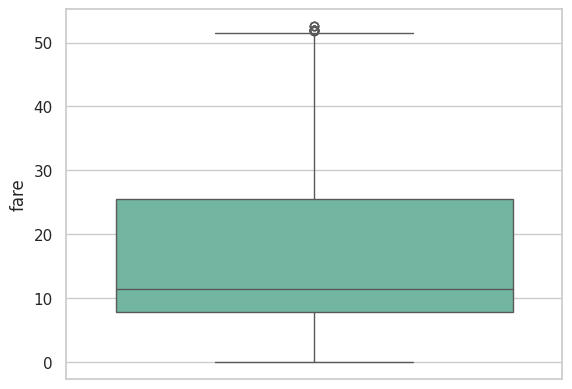

In [29]:
sns.boxplot(df['fare'], palette='Set2')
plt.show()

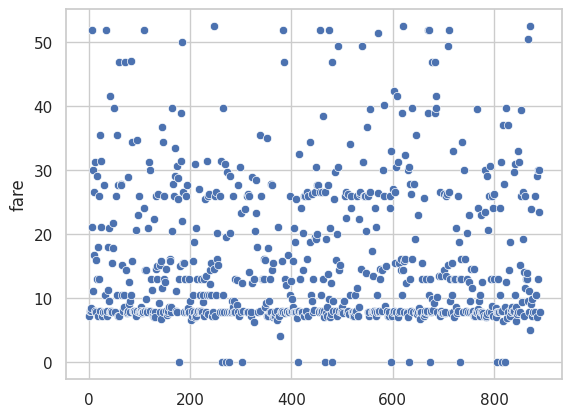

In [43]:
sns.scatterplot(df['fare'])
plt.show()



### EDA қорытындысы
Барлық бағандардың сипаттамаларын, бос мәндерін, санаттық белгілерді кодтауды және жаңа Feature Engineering нәтижелерін біріктіріп, қысқаша қорытынды жасаңыз.


Қортыныдылай келе
1. Титаник кемесінде болғандардың көп бөлігі 20-35 жас аралығында болған
2. Тірі қалғандар ең бірінші кезекте жынысы бойынша көп бөлігі әйел адамдар, класс деңгейі бойынша 1 класстағылар